## 確率ロボティクス　課題
このプログラムは，Q学習を用いて12×12マスの迷路を解くプログラムです．

* 注意点\
スタート・ゴールが壁に埋まらないような処理が入っていますが、迷路が自動生成のためスタートとゴールの間が壁で遮られる場合があります．
その場合は上手くいきそうな地図が出るまでやり直してください．

### インポートするモジュール
今回使用したモジュールは，迷路を表示するためのmatplotlib，数値計算を高速化するmath，numpy，jupyter上で動画を埋め込むためのIPython.displayで構成されています．また迷路の生成，学習の対象と行動の反映をするプログラムを別に用意しインポートしています．

In [1]:
import matplotlib
import math
import IPython.display
%matplotlib inline

import numpy as np
from map import Map
from agent import Agent

### Q学習　アルゴリズム
ここではQ学習を行っている部分について記述しています．

---------------
* インスタンス化　1-10行目\
参考としたプログラムと異なる点は行動価値関数の大きさです.
自分の位置を見て学習していましたが，今回のコードでは周囲8マスの状態を見て学習を行うため，行動価値関数のサイズの変更を行う必要がありました．行動価値関数のサイズがなぜこの数字になったのかはAgentのコード部で説明します．

---------------
* 報酬　29-34行目\
ここでは報酬を決めています．
参考としたプログラムと異なる点は，ゴールまでの距離を報酬として引いている点です．自分のプログラムでは実行するたびに地図の形が変わります．異なる地図を使用した場合でも共通して行動の指標となるものを検討した結果がこのゴールまでの距離でした．
三平方の定理から求めたゴールまでの距離を報酬から引くことで，できるだけ早くゴールの方向へ向かう行動を期待しこの報酬としました．

---------------


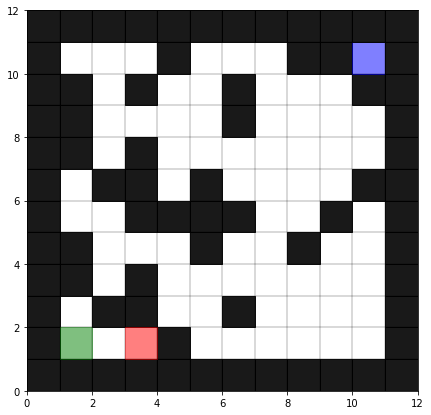

In [ ]:
class q_learning(object):
    ###インスタンス化
    def __init__(self):
        self.map = Map()#Mapの呼び出し
        self.agent = Agent()#Agentの呼び出し
        #各パラメータの設定
        self.max_episode = 50#エピソード数
        self.steps = 300#ステップ数
        self.gamma = 0.9#割引率
        self.alpha = 0.8#ステップサイズ
        self.q_table = np.random.uniform(low=-1,high=1,\
                                    size=(25856,self.agent.action_space))
　　###行動決定
    def decide_action(self,next_state,episode,q_table):
        first_probability = 0.75
        epsilon = first_probability * (1/(episode+1))#イプシロンの計算
        #イプシロンが0から1の間のランダムな値より小さいかどうかで学習の進み具合を判断する
        #イプシロンが乱数の値より小さい時
        if epsilon <= np.random.uniform(0,1):
            next_action = np.argmax(q_table[next_state]) #最も報酬が高いと思われる方向へ移動
        #イプシロンが乱数の値と同じか大きいとき
        else:
            prob = sum(q_table[next_state]+100) 
            w = (q_table[next_state]+100) / prob
            next_action = np.random.choice(range(4) ,p=w) #ランダムな方向へ移動
        return next_action
　　###Qテーブルの更新
    #公式に従ってQテーブルを更新する
    def update_Qtable(self,q_table,state,action,reward,next_state):
        next_max_q = max(q_table[next_state])
        q_table[state,action] = (1 - self.alpha) * q_table[state,action]+\
                                self.alpha * (reward + self.gamma * next_max_q)
        return q_table

    #報酬
    def reward(self,done,state,next_state):
        #ゴールしたら追加する報酬
        if done:
            reward = 300
        #自己位置とゴールまでの距離を報酬から引き続ける
        else:
            reward  = -(math.sqrt((self.map.goal_pos[0]-self.agent.pos[0])**2)+\
                        math.sqrt((self.map.goal_pos[1]-self.agent.pos[1])**2))*0.5    
        return reward

　　#実行
    def run(self):
        #学習を進めるためのループ
        for episode in range(self.max_episode):
            #エージェントの初期化
            self.agent = Agent(self.map.init_pos)
            state = self.agent.get_state(self.map.map)
            action = np.argmax(self.q_table[state]) 
            reward_of_episode = 0

            for i in range(self.steps):
                #移動できるかの確認
                direction = self.map.chack_movable(self.agent.pos) 
                self.agent.action(action,direction)
                done = self.agent.check_done()
                #自己位置の確認
                next_state = self.agent.get_state(self.map.map)
                #報酬の計算と更新
                reward = self.reward(done,state,next_state) 
                reward_of_episode += reward
                #Qテーブルの更新
                self.q_table = self.update_Qtable(self.q_table,state,action,reward,next_state)
                #移動
                action = self.decide_action(next_state,episode,self.q_table)
                #自己位置の更新
                state = next_state
                #迷路へのプロット
                self.map.plot(self.agent.pos,self.q_table)
                if done:
                    break
            print("episode %5d, reward %6d, step %5d" %(episode+1,reward_of_episode,i+1))#結果の表示

if __name__ == "__main__":
   q_learning().run()

### 学習の過程
学習に5分ほど時間がかかるため，実行したときの様子を倍速で再生したものを用意しました．

In [ ]:
IPython.display.YouTubeVideo('JOuJ6T_w22A', width=480, height=270)